In [2]:
### Graphing COVID-19 Cases

In [3]:
import pandas as pd
import seaborn as sns
sns.set() #seaborn set matplotlib theme

import json

s = open('./covid.json')
j = json.loads(s.read())

data = [{"country":key, **val} for key in j.keys() for val in j[key] if j[key][-1]['confirmed'] > 50000]



Sort of exploding the `key:Array` pairs into one table, adding the countries as a property, basically.

We then construct a DataFrame object with `pandas`. As we can see, our data is sufficiently 'squashed'

In [4]:
d = pd.DataFrame(list(data))
d.tail()

,country,date,confirmed,deaths,recovered
506,US,2020-3-30,161807,2978,5644
507,US,2020-3-31,188172,3873,7024
508,US,2020-4-1,213372,4757,8474
509,US,2020-4-2,243453,5926,9001
510,US,2020-4-3,275586,7087,9707


In [5]:
d['date'] = pd.to_datetime(d['date'], format="%Y-%m-%d").dt.strftime('%m-%d')


Converting the date to a `datetime` object adds zeroes to the day. I couldn't get the graph to render correctly when taking a slice.

In [6]:
d = d.pivot(index='date', columns = 'country', values='confirmed')
d

country,China,France,Germany,Iran,Italy,Spain,US
date,,,,,,,
01-22,548,0,0,0,0,0,1
01-23,643,0,0,0,0,0,1
01-24,920,2,0,0,0,0,2
01-25,1406,3,0,0,0,0,2
01-26,2075,3,0,0,0,0,5
...,...,...,...,...,...,...,...
03-30,82198,45170,66885,41495,101739,87956,161807
03-31,82279,52827,71808,44605,105792,95923,188172
04-01,82361,57749,77872,47593,110574,104118,213372


We pivot the table using date as the index, shaping the data for our graph.

In [7]:
d.index

Index(['01-22', '01-23', '01-24', '01-25', '01-26', '01-27', '01-28', '01-29',
       '01-30', '01-31', '02-01', '02-02', '02-03', '02-04', '02-05', '02-06',
       '02-07', '02-08', '02-09', '02-10', '02-11', '02-12', '02-13', '02-14',
       '02-15', '02-16', '02-17', '02-18', '02-19', '02-20', '02-21', '02-22',
       '02-23', '02-24', '02-25', '02-26', '02-27', '02-28', '02-29', '03-01',
       '03-02', '03-03', '03-04', '03-05', '03-06', '03-07', '03-08', '03-09',
       '03-10', '03-11', '03-12', '03-13', '03-14', '03-15', '03-16', '03-17',
       '03-18', '03-19', '03-20', '03-21', '03-22', '03-23', '03-24', '03-25',
       '03-26', '03-27', '03-28', '03-29', '03-30', '03-31', '04-01', '04-02',
       '04-03'],
      dtype='object', name='date')

our `date` property is now the index.

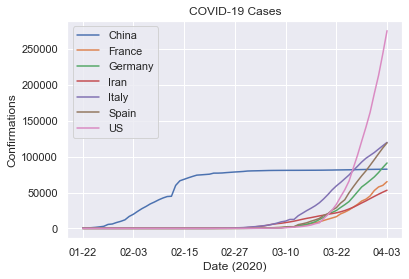

In [8]:
p = sns.lineplot(data=d, hue='country', dashes=False)

_ = p.set_xticks(d.index[::12]) # spreads the data out
_ = p.set_ylabel('Confirmations')
_ = p.set_xlabel('Date (2020)')
_ = p.set_title('COVID-19 Cases')